Скачать данные из соревнования, пока можете работать только с train.csv. Считать их.

In [9]:
import pandas as pd
l1d = pd.read_csv('train.csv')
y = l1d['Credit Default']

__1.__ Построить график распределения целевой переменной. Сделать выводы.

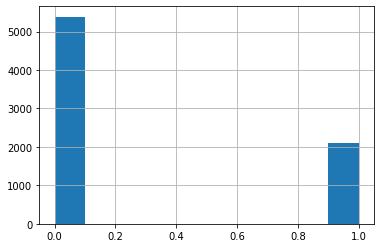

In [10]:
pd.Series(y).hist()

In [13]:
l1d['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

Выводы:   
- к своеобразному построению гистограмм надо привыкнуть (нулевые значения отображаются после нуля, а единичные значения отображаются до единицы);
- данные выглядят логично, так как большая часть заемщиков, при нормальных условиях, выплачивают ежемесячные обязательства по кредитам;
- количество просрочек составляют 0.28 всех случаев, поэтому, при отсутствии подробностей о текущей кредитной политики банка, рекомендовал бы незначительное ужесточение кредитной политики, чтобы снизить количество просрочек минимум до 0.2;
- оценка с точки зрения метрик accuracy, precision, recall и пр. невозможна так как нет точного понимания параметров TP, FP, FN и пр., так как данные являются статистическими, а не аналитическими.